In [2]:
import pandas as pd
%matplotlib inline

In [3]:
from pathlib import Path
csvpath = Path('../Resources/AirPassengers.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Month', infer_datetime_format=True)
df.head()

,NumberPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


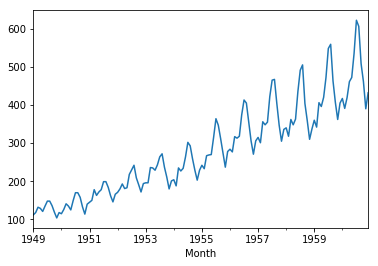

In [4]:
df['NumberPassengers'].plot()

# Autocorrelation and Partial Autocorrelation Analysis

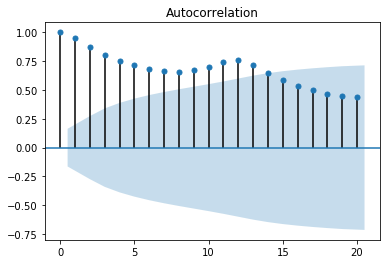

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df, lags=20);

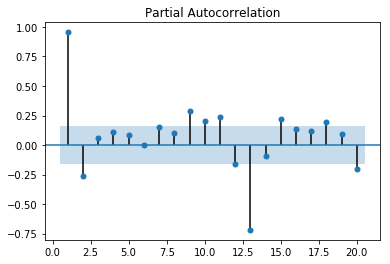

In [7]:
plot_pacf(df, zero=False, lags=20);

# ARIMA Model

In [8]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['NumberPassengers'], order=(2, 1, 2))

C:\Users\mshel\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mshel\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [9]:
results = model.fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.NumberPassengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Mon, 09 Nov 2020   AIC                           1344.043
Time:                        19:16:22   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.NumberPassengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.NumberPassengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.NumberPassengers    -1.9098      0.065    -29.507      0.000      -2.037      -1.783
ma.L2.D.NumberPassengers     0.9996      0.068     14.806      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2965j            1.0002           -0.0479
MA.2            0.9552           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

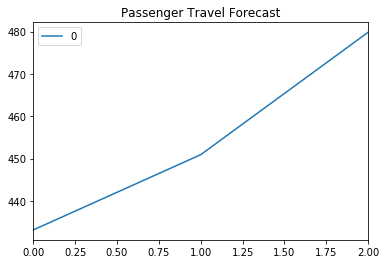

In [11]:
# Visualize the forecast
pd.DataFrame(results.forecast(steps=3)[0]).plot(title="Passenger Travel Forecast")

In [15]:
# A second model with a different order
model2 = ARIMA(df['NumberPassengers'], order=(2, 1, 4))

C:\Users\mshel\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mshel\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [16]:
res2 = model2.fit()

C:\Users\mshel\anaconda3\envs\alpacaenv\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [14]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.NumberPassengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -661.292
Method:                       css-mle   S.D. of innovations             23.715
Date:                Mon, 09 Nov 2020   AIC                           1338.585
Time:                        19:16:36   BIC                           1362.288
Sample:                    02-01-1949   HQIC                          1348.216
                         - 12-01-1960                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.6854      0.134     19.981      0.000       2.422       2.949
ar.L1.D.NumberPassengers     0.9143      0.082     11.141      0.000       0.753       1.075
ar.L2.D.NumberPassengers    -0.7710      0.080     -9.638      0.000      -0.928      -0.614
ma.L1.D.NumberPassengers    -0.8356      0.101     -8.270      0.000      -1.034      -0.638
ma.L2.D.NumberPassengers     0.3272      0.122      2.691      0.007       0.089       0.565
ma.L3.D.NumberPassengers     0.3086      0.114      2.699      0.007       0.084       0.533
ma.L4.D.NumberPassengers    -0.7999      0.079    -10.111      0.000      -0.955      -0.645
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5929           -0.9723j            1.1388           -0.1628
AR.2            0.5929           +0.9723j            1.1388            0.1628
MA.1            1.0001           -0.0000j            1.0001           -0.0000
MA.2            0.3179           -0.9481j            1.0000           -0.1985
MA.3            0.3179           +0.9481j            1.0000            0.1985
MA.4           -1.2500           -0.0000j            1.2500           -0.5000
-----------------------------------------------------------------------------
"""